In [29]:
from lut import LutSubSamp

import numpy as np
import matplotlib.pyplot as plt

import time

# Functions

In [30]:
def print_lookup_table(lookup_table):
    print("i\tR\tG\tB")
    for i in range(len(lookup_table)):
        r,g,b = lookup_table[i]
        print(f"{i+1}\t{r}\t{g}\t{b}")

In [31]:
def quantify_image(image, lookup_table):
    """Quantify the image using the LUT"""
    output_image = np.zeros(image.shape, dtype=np.uint8)

    width, height = image.shape[:2]
    for x in range(width):
        for y in range(height):
            color = image[x,y]

            def color_distance(color1, color2):
                return np.sqrt(np.sum((color1 - color2) ** 2))

            distances = [color_distance(color, lut_color) for lut_color in lookup_table]
            closest_color_index = np.argmin(distances)
            output_image[x,y] = lookup_table[closest_color_index]

    return output_image

In [32]:
def plot_image_transform(image, output_image):
    plt.subplot(1,2,1)
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.imshow(output_image)

    plt.show()

In [33]:
def mse_error(img1, img2):
    """Mean Squared Error between two images"""
    return np.mean((img1 - img2) ** 2)

### Other functions

In [34]:
def preprocss_grayscale(image):
    w,h = image.shape[:2]
    im_rgb = np.zeros((w, h, 3), dtype=np.uint8)

    # preprocess the image
    for x in range(w):
        for y in range(h):
            c = image[x,y]
            im_rgb[x,y] = [c, c, c]

    return im_rgb

In [35]:
def run(img_name, lookup_table, preprocess_func=None):
    img = plt.imread("../res/" + img_name)
    if preprocess_func:
        img = preprocess_func(img)

    # Run with timing info
    start = time.time()
    output_image = quantify_image(img, lookup_table)
    end = time.time()

    error = round(mse_error(img, output_image), 3)
    time_elapsed = round(end - start, 3)

    print("Error:", error)
    print("Time elapsed:", time_elapsed, "seconds")

    plot_image_transform(img, output_image)

# Look up table with 8 colors

In [36]:
LUT = LutSubSamp(8)
print_lookup_table(LUT)

i	R	G	B
1	63	191	191
2	191	191	191
3	63	63	191
4	191	63	191
5	63	191	63
6	191	191	63
7	63	63	63
8	191	63	63


Error: 105.5
Time elapsed: 5.163 seconds


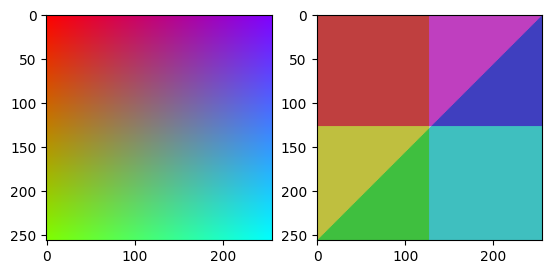

In [37]:
run("TP01-01.bmp", LUT)

Error: 110.328
Time elapsed: 50.073 seconds


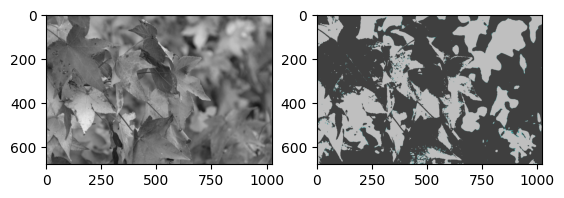

In [38]:
run("TP01-02.jpg", LUT, preprocess_func=preprocss_grayscale)

Error: 106.219
Time elapsed: 48.661 seconds


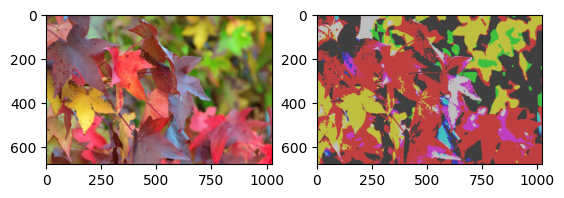

In [39]:
run("TP01-03.jpg", LUT)

# Look up table with 32 colors

In [40]:
LUT = LutSubSamp(32)
print_lookup_table(LUT)

i	R	G	B
1	191	159	159
2	191	223	159
3	191	159	223
4	191	223	223
5	63	159	159
6	63	223	159
7	63	159	223
8	63	223	223
9	159	63	159
10	223	63	159
11	159	63	223
12	223	63	223
13	159	159	63
14	223	159	63
15	159	223	63
16	223	223	63
17	63	31	159
18	63	95	159
19	63	31	223
20	63	95	223
21	63	159	31
22	63	159	95
23	63	223	31
24	63	223	95
25	159	63	31
26	159	63	95
27	223	63	31
28	223	63	95
29	63	31	95
30	63	95	95
31	63	31	31
32	63	95	31


Error: 98.186
Time elapsed: 16.575 seconds


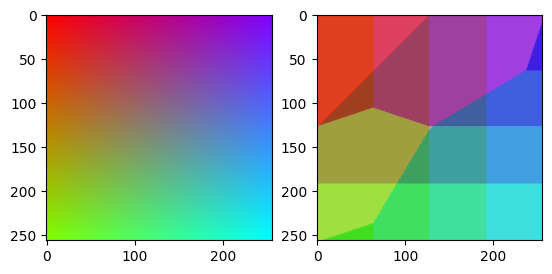

In [41]:
run("TP01-01.bmp", LUT)

Error: 98.427
Time elapsed: 182.719 seconds


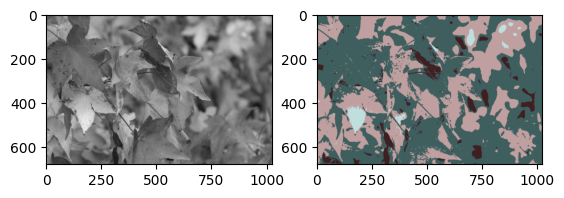

In [42]:
run("TP01-02.jpg", LUT, preprocess_func=preprocss_grayscale)

Error: 97.597
Time elapsed: 190.689 seconds


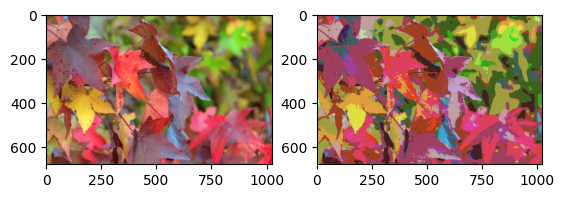

In [43]:
run("TP01-03.jpg", LUT)

# Experiments

[[168, 168, 168], [206, 206, 206], [175, 175, 175], [213, 213, 213], [130, 130, 130], [167, 167, 167], [137, 137, 137], [175, 175, 175], [102, 102, 102], [121, 121, 121], [109, 109, 109], [129, 129, 129], [148, 148, 148], [167, 167, 167], [185, 185, 185], [204, 204, 204], [55, 55, 55], [92, 92, 92], [62, 62, 62], [100, 100, 100], [115, 115, 115], [122, 122, 122], [153, 153, 153], [160, 160, 160], [88, 88, 88], [95, 95, 95], [107, 107, 107], [114, 114, 114], [47, 47, 47], [85, 85, 85], [40, 40, 40], [78, 78, 78]]


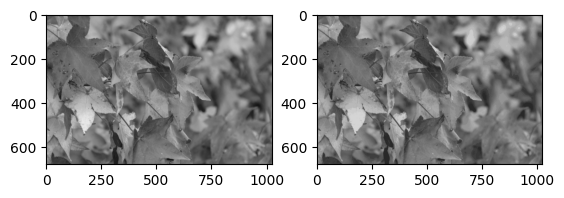

In [44]:
im_02 = plt.imread("../res/TP01-02.jpg")
im_02_rgb = preprocss_grayscale(im_02)

def rgb2gray(rgb):
    grayscale = int(np.dot(rgb, [0.2989, 0.5870, 0.1140]))
    return [grayscale, grayscale, grayscale]

grayscale_LUT = [ rgb2gray(color) for color in LUT ]
print(grayscale_LUT)

output_image_02 = quantify_image(im_02_rgb, lookup_table=grayscale_LUT)
plot_image_transform(im_02_rgb, output_image_02)